## Observations and Insights 

In [2]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import os

#Create DataFrames for mouse data and study results
mouse_metadata_df = pd.read_csv(os.path.join("data", "Mouse_metadata.csv"))
study_results_df = pd.read_csv(os.path.join("data", "Study_results.csv"))

#Merge data into single DataFrame
merged_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID")

#Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#Check for the number of mice.
mouse_count = len(merged_df["Mouse ID"].unique())
mouse_count

249

In [6]:
# Check for duplicate mice
merged_df["Mouse ID"].value_counts()
#Check outlier
bad_data_full = merged_df.loc[merged_df["Mouse ID"] == "g989"]
bad_mouse = bad_data_full[["Mouse ID", "Timepoint"]]
bad_mouse

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [8]:
#Optional: Get all the data for the duplicate mouse ID.
bad_mouse_index = bad_data_full.index
bad_data_full

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
#Create a cleaned DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop(index = bad_mouse_index)
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(cleaned_df["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [15]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each of the regimen
drug_grouped = cleaned_df.groupby(["Drug Regimen"])
means_grouped = drug_grouped["Tumor Volume (mm3)"].mean()
medians_grouped = drug_grouped["Tumor Volume (mm3)"].median()
variance_grouped = drug_grouped["Tumor Volume (mm3)"].var()
std_grouped = drug_grouped["Tumor Volume (mm3)"].std()
sem_grouped = drug_grouped["Tumor Volume (mm3)"].sem()
summ_index = cleaned_df["Drug Regimen"].drop_duplicates()
summ_stat_df = pd.DataFrame({
    "Mean of Tumor Volume (mm3)" : means_grouped,
    "Median of Tumor Volume (mm3)" : medians_grouped,
    "Variance of Tumor Volume (mm3)" : variance_grouped,
    "STD of Tumor Volume (mm3)" : std_grouped,
    "SEM of Tumor Volume (mm3)" : sem_grouped
}, index = summ_index)
summ_stat_df

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),STD of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_grouped = drug_grouped["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

#Renamed titles for clarity
agg_drug_grouped = agg_drug_grouped.rename(columns = {
    "mean" : "Mean of Tumor Volume (mm3)",
    "median" : "Median of Tumor Volume (mm3)",
    "var": "Variance of Tumor Volume (mm3)",
    "std": "STD of Tumor Volume (mm3)",
    "sem":"SEM of Tumor Volume (mm3)"
})
agg_drug_grouped

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),STD of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

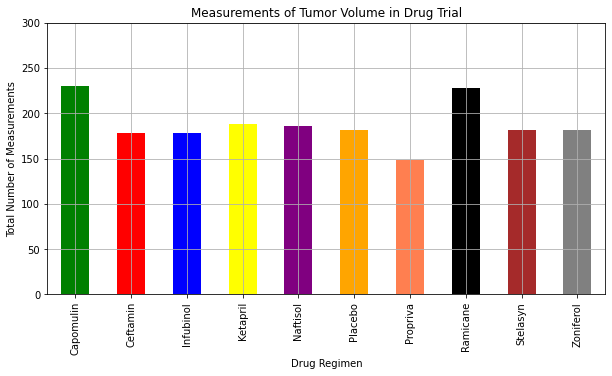

In [186]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
color_list = ["green", "red", "blue", "yellow", "purple", "orange", "coral", "black","brown", "gray"]
measurement_count_clean = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()
measurements_pd_bar = measurement_count_clean.plot(kind = "bar", color = color_list,title = "Measurements of Tumor Volume in Drug Trial", 
                                                   ylabel = "Total Number of Measurements", grid = True, ylim = (0,300),
                                                  figsize = (10,5))
plt.show()

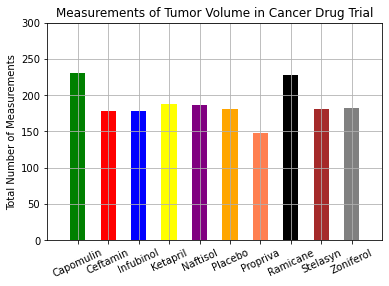

In [187]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = measurement_count_clean.index
plt.bar(x = drugs, height = measurement_count_clean, width = .5, color = color_list)
plt.ylabel("Total Number of Measurements")
plt.title("Measurements of Tumor Volume in Cancer Drug Trial")
plt.ylim(0,300)
plt.grid(True)
plt.tick_params(axis = "x", labelrotation = 25)
plt.xlim(right = 10, left = -1)
plt.show()

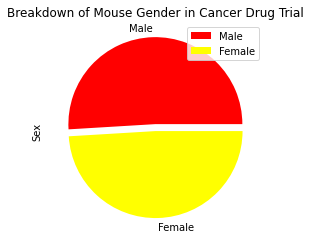

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_breakdown = cleaned_df["Sex"].value_counts()
gender = gender_breakdown.index
gender_breakdown.plot(kind = "pie", explode = [.08,0], title = "Breakdown of Mouse Gender in Cancer Drug Trial", 
                      legend = True, colors = ["red", "yellow"])
plt.show()

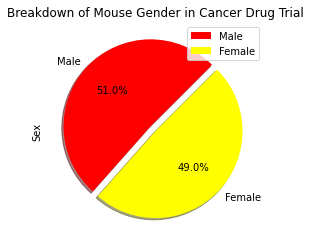

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x = gender_breakdown, explode = [.08,0], colors = ["red", "yellow"], labels = gender, autopct = "%1.1f%%",
       shadow = True, startangle = 45)
plt.ylabel("Sex")
plt.title("Breakdown of Mouse Gender in Cancer Drug Trial")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [357]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
spec_drug_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") |(cleaned_df["Drug Regimen"] == "Ramicane") |
                              (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = spec_drug_df.loc[spec_drug_df["Timepoint"] == spec_drug_df["Timepoint"].max()]
final_tumor_volume = max_timepoint_df[["Mouse ID", "Tumor Volume (mm3)"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume_merge = pd.merge(cleaned_df, final_tumor_volume, on = "Mouse ID")
rn_fnl_vol_df = final_volume_merge.rename(columns = ({
    "Tumor Volume (mm3)_y" : "Final Tumor Volume (mm3)",
    "Tumor Volume (mm3)_x" : "Tumor Volume (mm3):"
}))
rn_fnl_vol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3):,Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
